In [1]:
import numpy
import tensorflow as tf
mnist = tf.keras.datasets.mnist

print(tf.__version__)
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation="softmax")
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam', 
              loss=loss_fn,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5)


model.evaluate(x_test, y_test, verbose = 2)



2.1.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/sample - loss: 1.5865 - accuracy: 0.8923
Epoch 2/5
60000/60000 [==============================] - 3s 56us/sample - loss: 1.5254 - accuracy: 0.9417
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 1.5112 - accuracy: 0.9540
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 1.5040 - accuracy: 0.9605s - los
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 1.4978 - accuracy: 0.9664
10000/10000 - 0s - loss: 1.4961 - accuracy: 0.9674


[1.4960579626083375, 0.9674]

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.layers

In [4]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [5]:
weights

array([[ 0.06399728, -0.04386856,  0.03828467, ...,  0.0120791 ,
        -0.0148394 ,  0.0670277 ],
       [-0.02790356, -0.03311463, -0.0332429 , ..., -0.0350573 ,
        -0.0100101 ,  0.01374075],
       [ 0.07005513, -0.07087374,  0.06011518, ..., -0.06312594,
         0.04472329,  0.04937959],
       ...,
       [-0.02497714,  0.00764443, -0.00775126, ...,  0.05727581,
         0.03129707, -0.07816355],
       [ 0.06507389, -0.03899005,  0.04668643, ..., -0.07347343,
        -0.06954068,  0.02253591],
       [ 0.00731384, -0.04382697, -0.04295011, ..., -0.07648578,
        -0.05701787,  0.03075475]], dtype=float32)

In [6]:
biases

array([-0.08313871, -0.14392707, -0.01740606,  0.01697307,  0.068643  ,
        0.10075405,  0.07256081,  0.01006657,  0.03827336, -0.00115576,
       -0.0915783 ,  0.19156173, -0.00675546, -0.09348515, -0.02121527,
       -0.05993035, -0.04273181,  0.14320599, -0.08428614,  0.15203844,
        0.07344867,  0.02339578,  0.04830393, -0.04668044,  0.0829602 ,
        0.18334231,  0.13620035,  0.15073179, -0.11403317,  0.05935587,
        0.20579003,  0.14908874,  0.22982702,  0.21840343,  0.02482323,
        0.2765315 , -0.12017726,  0.05294263, -0.01492382, -0.25323552,
        0.07505511,  0.05971459, -0.02093274,  0.13336973, -0.19999814,
        0.14663579,  0.17497341, -0.01113123,  0.2316372 , -0.06562614,
        0.2009057 ,  0.08756593, -0.00551159,  0.08469001,  0.05406655,
       -0.05666992, -0.12209551, -0.03323294, -0.04176496, -0.07573964,
       -0.0229373 ,  0.13288517,  0.03311631,  0.17742279,  0.12671973,
        0.01037021, -0.03472614,  0.07742567,  0.08436687,  0.03

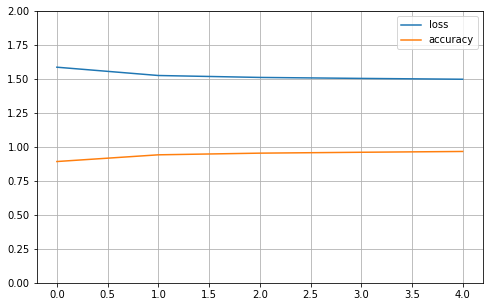

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

<IPython.core.display.Javascript object>


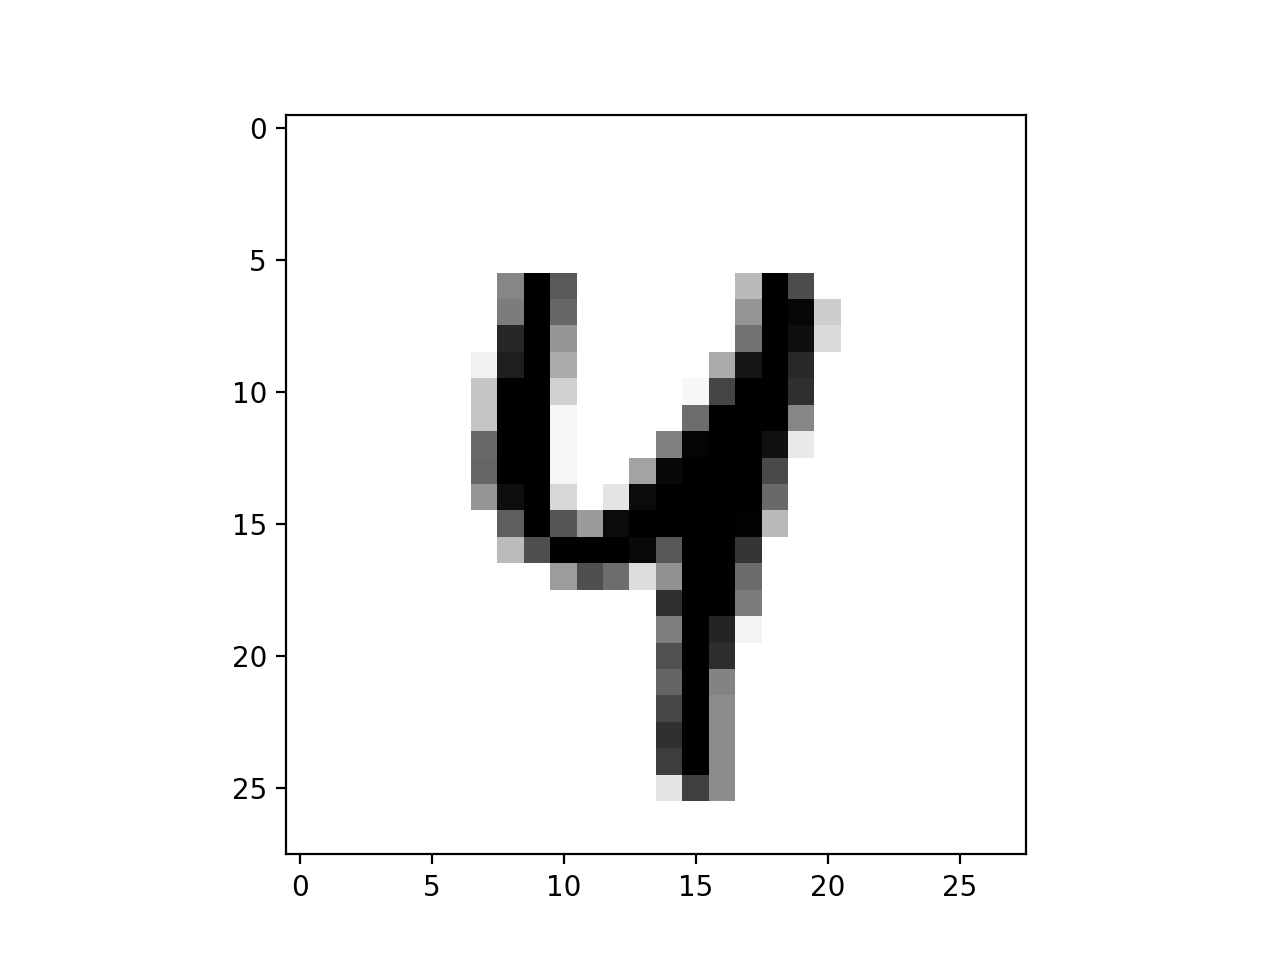

In [8]:
%matplotlib notebook
digit = x_test[42]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [9]:
digit = x_test[42:43]
y_prob = model.predict(digit)
y_prob.round(2)

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
y_pred = model.predict_classes(digit)
print(y_pred.round(2))

[4]
